<a href="https://colab.research.google.com/github/annulet/CNN_NVIDIA/blob/master/comp_vision_hw_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [0]:
img = imageio.imread('20171123_190013.jpg')

In [3]:
img.shape

(961, 721, 3)

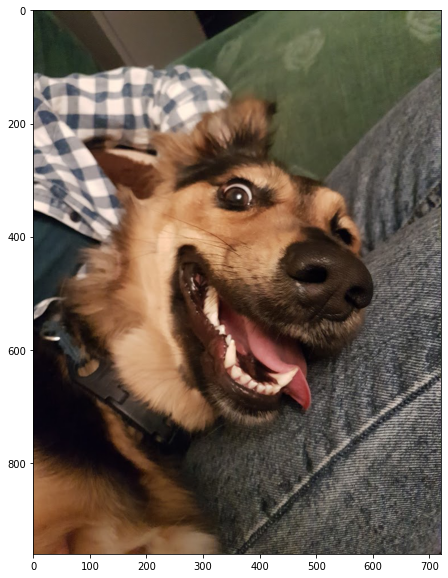

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(img);

Создание линейного фильтра

In [0]:
win_size = (5, 5)
w = np.array([
              [-1, -1, 0, 1, 1], 
              [-1, -1, 0, 1, 1], 
              [-1, -1, 0, 1, 1], 
              [-1, -1, 0, 1, 1], 
              [-1, -1, 0, 1, 1]
              ])

out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1,
     img.shape[2]),
    dtype=np.float32
)
for i in range(out_img.shape[0]):
  for j in range(out_img.shape[1]):
    for k in range(out_img.shape[2]):
      x = img[i: i + w.shape[0], j: j + w.shape[1], k]
      out_img[i, j, k] = np.sum(w * x)

In [0]:
out_img = out_img.astype(np.uint8)

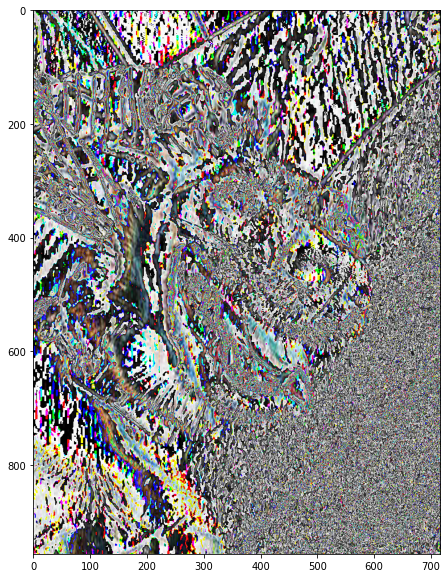

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(out_img);

In [0]:
win_size = (5, 5)
w = (np.abs(w) + np.abs(w.T)) /2

out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1,
     img.shape[2]),
    dtype=np.float32
)
for i in range(out_img.shape[0]):
  for j in range(out_img.shape[1]):
    for k in range(out_img.shape[2]):
      x = img[i: i + w.shape[0], j: j + w.shape[1], k]
      out_img[i, j, k] = np.sum(w * x)

In [0]:
out_img = out_img.astype(np.uint8)

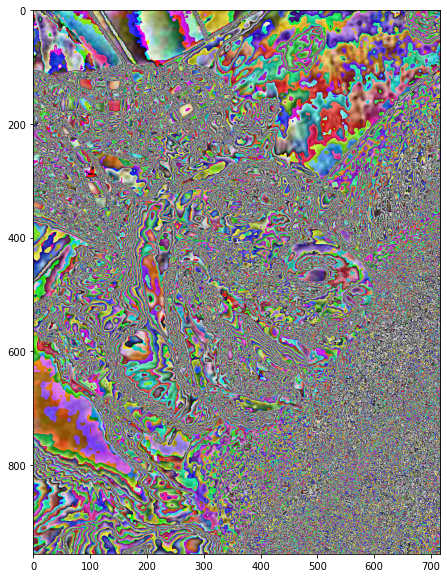

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(out_img);

In [0]:
# Box Blur
win_size = (11, 11)
w = np.ones(win_size, dtype=np.float32)
w /= np.sum(w)

out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1,
     img.shape[2]),
    dtype=np.float32
)
for i in range(out_img.shape[0]):
  for j in range(out_img.shape[1]):
    for k in range(out_img.shape[2]):
      x = img[i: i + w.shape[0], j: j + w.shape[1], k]
      out_img[i, j, k] = np.sum(w * x)

In [0]:
out_img = out_img.astype(np.uint8)

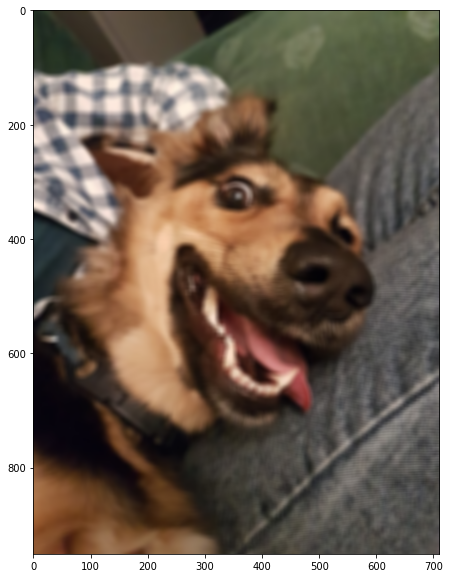

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(out_img);

In [0]:
# Gaussian blur
win_size = (11, 11)
sigma = 3
w = np.ones(win_size, dtype=np.float32)
for i in range(w.shape[0]):
  for j in range(w.shape[1]):
    w[i, j] = np.exp(- (i - w.shape[0] // 2)**2 / sigma**2 / 2
                      - (j - w.shape[1] // 2)**2 / sigma**2 / 2)
w /= np.sum(w)

out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1,
     img.shape[2]),
    dtype=np.float32
)
for i in range(out_img.shape[0]):
  for j in range(out_img.shape[1]):
    for k in range(out_img.shape[2]):
      x = img[i: i + w.shape[0], j: j + w.shape[1], k]
      out_img[i, j, k] = np.sum(w * x)

In [0]:
out_img = out_img.astype(np.uint8)

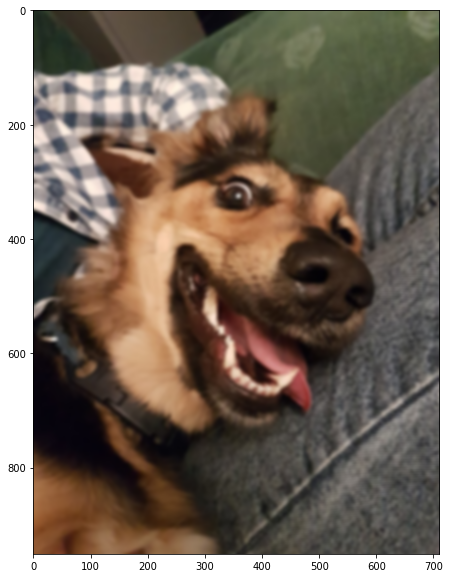

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(out_img);